<a href="https://colab.research.google.com/github/dhaev/Machine-Learning/blob/main/AE_VAE_Grayscale_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Traditional auto encoders and Variational auto encoders

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import layers
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap


## **Dataset**
**Fashion-MNIST dataset:**
>
contains 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images
>
**License:**

The copyright for Fashion-MNIST is held by Zalando SE. Fashion-MNIST is licensed under the [MIT license](https://github.com/zalandoresearch/fashion-mnist/blob/master/LICENSE).
>
**preprocessing:**
* normalize image
* flatten image

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the images to [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images
flattened_x_train = x_train.reshape((x_train.shape[0], -1))
flattened_x_test = x_test.reshape((x_test.shape[0], -1))
x_train.shape

4422102/4422102 [==============================] - 1s 0us/step


(60000, 28, 28)

### Auto encoders

In [ ]:
def compile_and_train_ae(x_train, x_test, autoencoder, encoder, decoder):
  # Compile the autoencoder
  autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

  # Train the autoencoder
  autoencoder.fit(x_train, x_train,
                  epochs=50,
                  batch_size=256,
                  shuffle=True,
                  validation_data=(x_test, x_test))

  # Encode and decode some digits
  encoded_imgs = encoder.predict(x_test)
  decoded_imgs = decoder.predict(encoded_imgs)
  return decoded_imgs

### Auto Encoder Model one
>
**Encoder:**

* The encoder consists of a single layer, which is a dense (fully connected) layer with 64 units.
* The activation function used in this layer is the Rectified Linear Unit (ReLU) function.
* The input to the encoder is an image that has been flattened to a 1D array of 784 elements (the original image size is 28x28 pixels).

>
**Decoder:**

* The decoder also consists of a single layer, which is a dense layer with 784 units.
* The activation function used in this layer is the sigmoid function.
* The input to the decoder is the encoded representation of the original image, which is a 1D array of 64 elements.

>
**Auto encoder**
* The autoencoder is trained to minimize the difference between the original input and the output of the decoder (the reconstructed image). The model is compiled with the Adam optimizer and the binary cross-entropy loss function
* It is trained for 50 epochs using a batch size of 256

In [ ]:
def ae_model_one():
  # Define the size of the encoded representations
  encoding_dim = 64  # 64 floats -> compression of factor 24.5, assuming the input is 784 floats

  # Define the input layer
  input_img = Input(shape=(784,))

  # Define the encoding layer
  encoded = Dense(encoding_dim, activation='relu')(input_img)

  # Define the decoding layer
  decoded = Dense(784, activation='sigmoid')(encoded)

  # Define the autoencoder model
  autoencoder = Model(input_img, decoded)

  # Define the encoder model
  encoder = Model(input_img, encoded)

  # Define the decoder model
  encoded_input = Input(shape=(encoding_dim,))
  decoder_layer = autoencoder.layers[-1]
  decoder = Model(encoded_input, decoder_layer(encoded_input))

  decoded_imgs = compile_and_train_ae(flattened_x_train, flattened_x_test, autoencoder, encoder, decoder)
  return decoded_imgs





## Auto Encoder Model Two
>
**Encoder:**

* The encoder consists of three layers, which are all dense (fully connected) layers.
* The first layer has 128 units, the second layer has 64 units, and the third layer has 32 units.
* The activation function used in these layers is the Rectified Linear Unit (ReLU) function.
* The input to the encoder is an image that has been flattened to a 1D array of 784 elements ( the original image size is 28x28 pixels).

>
**Decoder:**

* The decoder consists of two layers, which are both dense layers.
* The first layer has 32 units and the second layer has 784 units.
* The activation function used in the first layer is the ReLU function, and in the second layer is the sigmoid function.
* The input to the decoder is the encoded representation of the original image, which is a 1D array of 32 elements.

>
**Auto encoder**
* same trainig parameters as model one

In [ ]:
def ae_model_two():
  # Define the size of the encoded representations
  encoding_dim = 32

  # Define the input layer
  input_img = Input(shape=(784,))

  encoded = Dense(128, activation='relu')(input_img)
  encoded = Dense(64, activation='relu')(encoded)
  encoded = Dense(encoding_dim, activation='relu')(encoded)

  decoded = Dense(encoding_dim, activation='relu')(encoded)
  # decoded = Dense(64, activation='relu')(decoded)
  # decoded = Dense(128, activation='relu')(decoded)
  decoded = Dense(784, activation='sigmoid')(decoded)

  # Define the autoencoder model
  autoencoder = Model(input_img, decoded)

  # Compile the autoencoder
  autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

    # Define the encoder model
  encoder = Model(input_img, encoded)

  # Define the decoder model
  encoded_input = Input(shape=(encoding_dim,))
  decoder_layer = autoencoder.layers[-1]
  decoder = Model(encoded_input, decoder_layer(encoded_input))

  decoded_imgs = compile_and_train_ae(flattened_x_train, flattened_x_test, autoencoder, encoder, decoder)
  return decoded_imgs


## Auto Encoder Model Three
>
**Encoder:**

* The encoder consists of a single layer, which is a dense (fully connected) layer with 32 units.
* The activation function used in this layer is the Rectified Linear Unit (ReLU) function.
* The input to the encoder is an image that has been flattened to a 1D array of 784 elements (assuming the original image size is 28x28 pixels).

>
**Decoder:**

* The decoder also consists of a single layer, which is a dense layer with 784 units.
* The activation function used in this layer is the sigmoid function.
* The input to the decoder is the encoded representation of the original image, which is a 1D array of 32 elements.

>
**Auto encoder**
* same parameters as model one

In [ ]:

def ae_model_three():
  name = 'autoencoder_model_three'
  # Define the size of the encoded representations
  encoding_dim = 32  # 64 floats -> compression of factor 24.5, assuming the input is 784 floats

  # Define the input layer
  input_img = Input(shape=(784,))

  # Define the encoding layer
  encoded = Dense(encoding_dim, activation='relu')(input_img)

  # Define the decoding layer
  decoded = Dense(784, activation='sigmoid')(encoded)

  # Define the autoencoder model
  autoencoder = Model(input_img, decoded)

  # Define the encoder model
  encoder = Model(input_img, encoded)

  # Define the decoder model
  encoded_input = Input(shape=(encoding_dim,))
  decoder_layer = autoencoder.layers[-1]
  decoder = Model(encoded_input, decoder_layer(encoded_input))

  decoded_imgs = compile_and_train_ae(flattened_x_train, flattened_x_test, autoencoder, encoder, decoder)
  return decoded_imgs


In [ ]:
ae_model_one_decoded_imgs = ae_model_one()

Epoch 1/50
235/235 [==============================] - 4s 15ms/step - loss: 0.3931 - val_loss: 0.3285
Epoch 2/50
235/235 [==============================] - 4s 16ms/step - loss: 0.3140 - val_loss: 0.3066
Epoch 3/50
235/235 [==============================] - 5s 20ms/step - loss: 0.2983 - val_loss: 0.2952
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2891 - val_loss: 0.2878
Epoch 5/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2835 - val_loss: 0.2839
Epoch 6/50
235/235 [==============================] - 4s 18ms/step - loss: 0.2805 - val_loss: 0.2815
Epoch 7/50
235/235 [==============================] - 4s 18ms/step - loss: 0.2784 - val_loss: 0.2797
Epoch 8/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2768 - val_loss: 0.2783
Epoch 9/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2756 - val_loss: 0.2776
Epoch 10/50
235/235 [==============================] - 5s 20ms/step - loss: 0.2747 - val_lo

In [ ]:
ae_model_two_decoded_imgs = ae_model_two()


Epoch 1/50
235/235 [==============================] - 5s 17ms/step - loss: 0.3972 - val_loss: 0.3245
Epoch 2/50
235/235 [==============================] - 4s 16ms/step - loss: 0.3152 - val_loss: 0.3121
Epoch 3/50
235/235 [==============================] - 5s 23ms/step - loss: 0.3072 - val_loss: 0.3070
Epoch 4/50
235/235 [==============================] - 4s 16ms/step - loss: 0.3029 - val_loss: 0.3042
Epoch 5/50
235/235 [==============================] - 4s 16ms/step - loss: 0.3001 - val_loss: 0.3007
Epoch 6/50
235/235 [==============================] - 5s 20ms/step - loss: 0.2978 - val_loss: 0.2988
Epoch 7/50
235/235 [==============================] - 4s 18ms/step - loss: 0.2960 - val_loss: 0.2986
Epoch 8/50
235/235 [==============================] - 4s 16ms/step - loss: 0.2944 - val_loss: 0.2958
Epoch 9/50
235/235 [==============================] - 4s 16ms/step - loss: 0.2931 - val_loss: 0.2945
Epoch 10/50
235/235 [==============================] - 5s 23ms/step - loss: 0.2920 - val_lo

In [ ]:
ae_model_three_decoded_imgs = ae_model_three()

Epoch 1/50
235/235 [==============================] - 6s 20ms/step - loss: 0.4174 - val_loss: 0.3454
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.3289 - val_loss: 0.3191
Epoch 3/50
235/235 [==============================] - 4s 15ms/step - loss: 0.3105 - val_loss: 0.3067
Epoch 4/50
235/235 [==============================] - 4s 16ms/step - loss: 0.3007 - val_loss: 0.2990
Epoch 5/50
235/235 [==============================] - 4s 16ms/step - loss: 0.2945 - val_loss: 0.2946
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2910 - val_loss: 0.2920
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2889 - val_loss: 0.2902
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.2875 - val_loss: 0.2891
Epoch 9/50
235/235 [==============================] - 4s 19ms/step - loss: 0.2866 - val_loss: 0.2884
Epoch 10/50
235/235 [==============================] - 3s 13ms/step - loss: 0.2859 - val_lo

In [ ]:

def calculate_reconstruction_losses(original, reconstructed):
    mse_loss = tf.keras.losses.mean_squared_error(original, reconstructed).numpy()
    bce_loss = tf.keras.losses.binary_crossentropy(original, reconstructed).numpy()
    return mse_loss, bce_loss

def display_ae_images_with_losses(x_test, decoded_imgs, n=10):
    plt.figure(figsize=(20, 6 + 0.5))  # Add extra space for captions

    for i in range(n):
        # Original image
        ax = plt.subplot(4, n, i + 1)
        original_img = x_test[i].reshape(28 , 28)
        plt.imshow(original_img)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Reconstructed image
        ax = plt.subplot(4, n, i + 1 + n)
        reconstructed_img = decoded_imgs[i].reshape(28 , 28)
        plt.imshow(reconstructed_img)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Difference image
        ax = plt.subplot(4, n, i + 1 + n * 2)
        difference = np.abs(original_img - reconstructed_img)
        plt.imshow(difference)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Calculate losses
        mse_loss, bce_loss = calculate_reconstruction_losses(original_img.flatten(), reconstructed_img.flatten())

        # Add captions with losses
        ax = plt.subplot(4, n, i + 1 + n * 3)
        plt.axis('off')
        loss_caption = f"MSE: {mse_loss:.4f}\nBCE: {bce_loss:.4f}"
        plt.text(0.5, 0.5, loss_caption, ha='center', va='center', fontsize=10, transform=ax.transAxes)

    plt.show()


def display_vae_images_with_losses(x_test, generator, latent_dim, n=10):
    plt.figure(figsize=(20, 6))

    for i in range(n):
        # Original image
        ax = plt.subplot(4, n, i + 1)
        original_img = x_test[i].reshape(28, 28, 1)
        plt.imshow(original_img)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Latent space sampling
        z_sample = np.array([np.random.normal(size=latent_dim)])
        x_decoded = generator.predict(z_sample)

        # Reconstructed image
        ax = plt.subplot(4, n, i + 1 + n)
        reconstructed_img = x_decoded[0].reshape(28, 28, 1)  # Corrected variable name
        plt.imshow(reconstructed_img)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Difference image
        ax = plt.subplot(4, n, i + 1 + n * 2)
        difference = np.abs(original_img - reconstructed_img)
        plt.imshow(difference)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Calculate losses
        mse_loss, bce_loss = calculate_reconstruction_losses(original_img.flatten(), reconstructed_img.flatten())

        # Add captions with losses
        ax = plt.subplot(4, n, i + 1 + n * 3)
        plt.axis('off')
        loss_caption = f"MSE: {mse_loss:.4f}\nBCE: {bce_loss:.4f}"
        plt.text(0.5, 0.5, loss_caption, ha='center', va='center', fontsize=10, transform=ax.transAxes)

    plt.show()

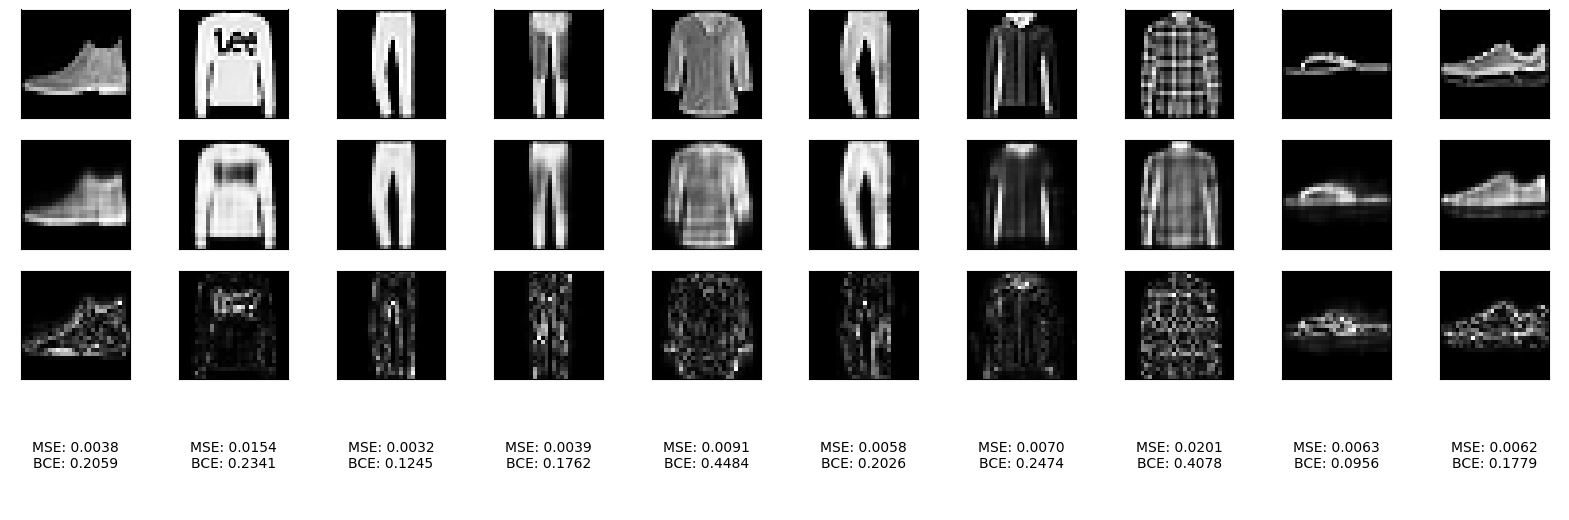

In [ ]:
display_ae_images_with_losses(x_test, ae_model_one_decoded_imgs, n=10)

The first model, which has a single encoder layer with 64 units, is able to reconstruct the outlines of the images. It shows some capability in reconstructing the striped pattern, but it struggles to clearly outline the word "Lee" on the shirt in the second image.

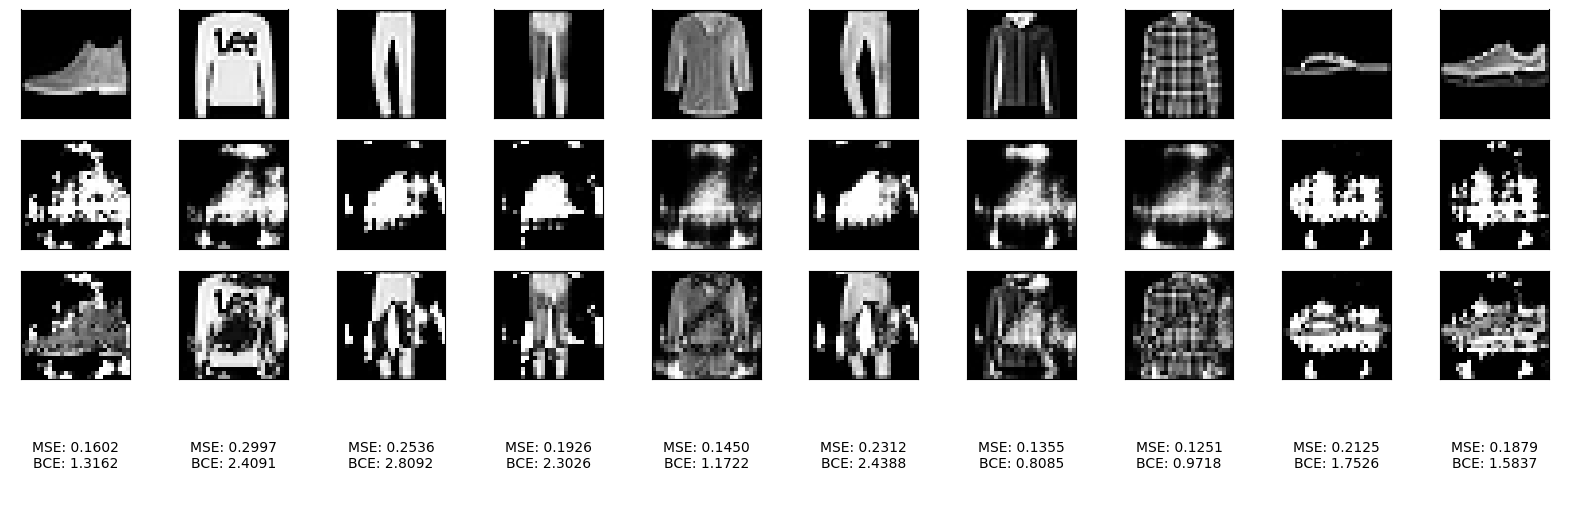

In [ ]:
display_ae_images_with_losses(x_test, ae_model_two_decoded_imgs, n=10)

I tried to create a deep auto encoder following [keras blog on building autoencoders](https://blog.keras.io/building-autoencoders-in-keras.html), however i had issues with the dimension of the decoder layers. So i think that is the reason for the jumbled pixels with nothing discernable.

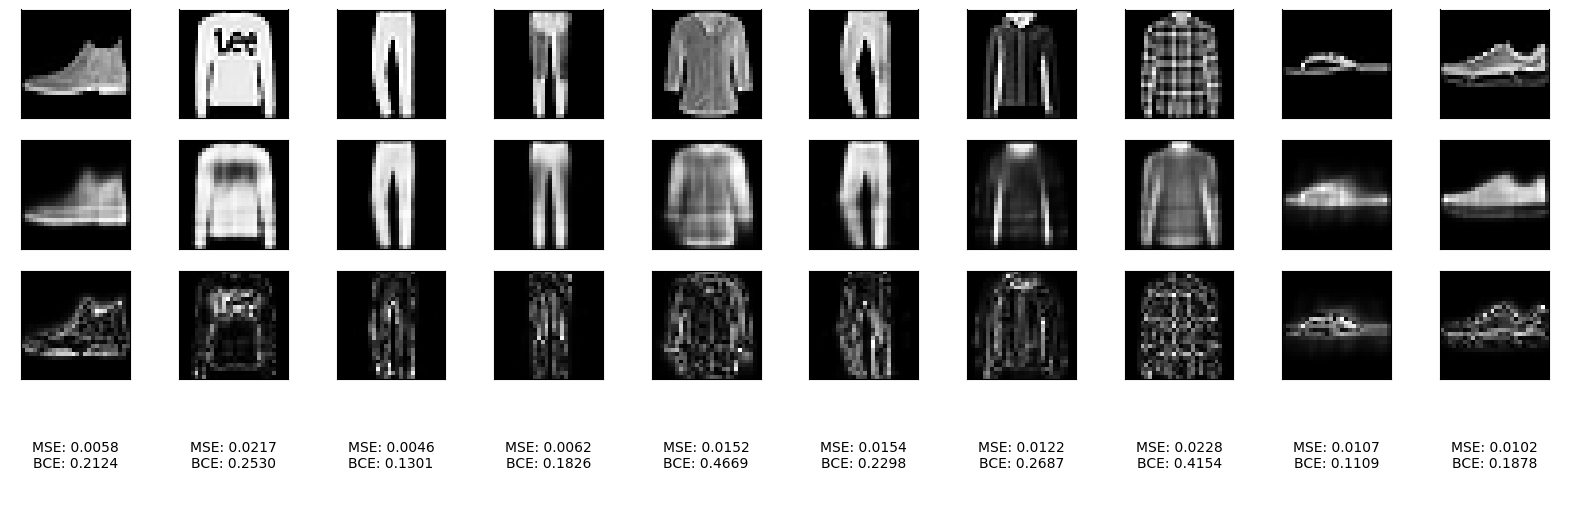

In [ ]:
display_ae_images_with_losses(x_test, ae_model_three_decoded_imgs, n=10)

The third autoencoder model, similar to the first, successfully reconstructs the image outline. However, it seems to have difficulty in accurately reproducing the striped patterns in the eighth image.

## Auto Encoder Model four - convolutional autoencoder

**Encoder:**

* The encoder consists of three convolutional layers, each followed by a max pooling layer.
* The first convolutional layer has 16 filters, the second has 8 filters, and the third also has 8 filters.
* Each convolutional layer uses a 3x3 kernel, a ReLU activation function, and ‘same’ padding which means the output has the same width and height as the original input.
* The max pooling layers have a pool size of 2x2 and use ‘same’ padding. They are used to downsample the input.

>
**Decoder:**

* The decoder consists of three convolutional layers, each followed by an upsampling layer, and a final convolutional layer.
* The first three convolutional layers have 8, 8, and 16 filters respectively. * Each of these layers uses a 3x3 kernel, a ReLU activation function, and ‘same’ padding (except for the third one).
* The upsampling layers have a size of 2x2 and are used to upsample the input.
* The final convolutional layer has 1 filter, uses a 3x3 kernel, a sigmoid activation function, and ‘same’ padding. This layer reconstructs the final output image from the encoded representation.

>
**Auto encoder**
* The autoencoder is trained to minimize the difference between the original input and the output of the decoder (the reconstructed image). The model is compiled with the Adam optimizer and the binary cross-entropy loss function
* It is trained for 50 epochs using a batch size of 128

In [ ]:

input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

cnn_autoencoder = Model(input_img, decoded)
cnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

cnn_autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 102s 215ms/step - loss: 0.3591 - val_loss: 0.3118
Epoch 2/50
469/469 [==============================] - 99s 210ms/step - loss: 0.3048 - val_loss: 0.3030
Epoch 3/50
469/469 [==============================] - 106s 227ms/step - loss: 0.2988 - val_loss: 0.2988
Epoch 4/50
469/469 [==============================] - 102s 217ms/step - loss: 0.2950 - val_loss: 0.2954
Epoch 5/50
469/469 [==============================] - 109s 232ms/step - loss: 0.2922 - val_loss: 0.2928
Epoch 6/50
469/469 [==============================] - 104s 222ms/step - loss: 0.2900 - val_loss: 0.2909
Epoch 7/50
469/469 [==============================] - 107s 229ms/step - loss: 0.2882 - val_loss: 0.2894
Epoch 8/50
469/469 [==============================] - 124s 264ms/step - loss: 0.2870 - val_loss: 0.2887
Epoch 9/50
469/469 [==============================] - 120s 255ms/step - loss: 0.2860 - val_loss: 0.2875
Epoch 10/50
469/469 [==============================] - 118s 252ms

313/313 [==============================] - 5s 15ms/step


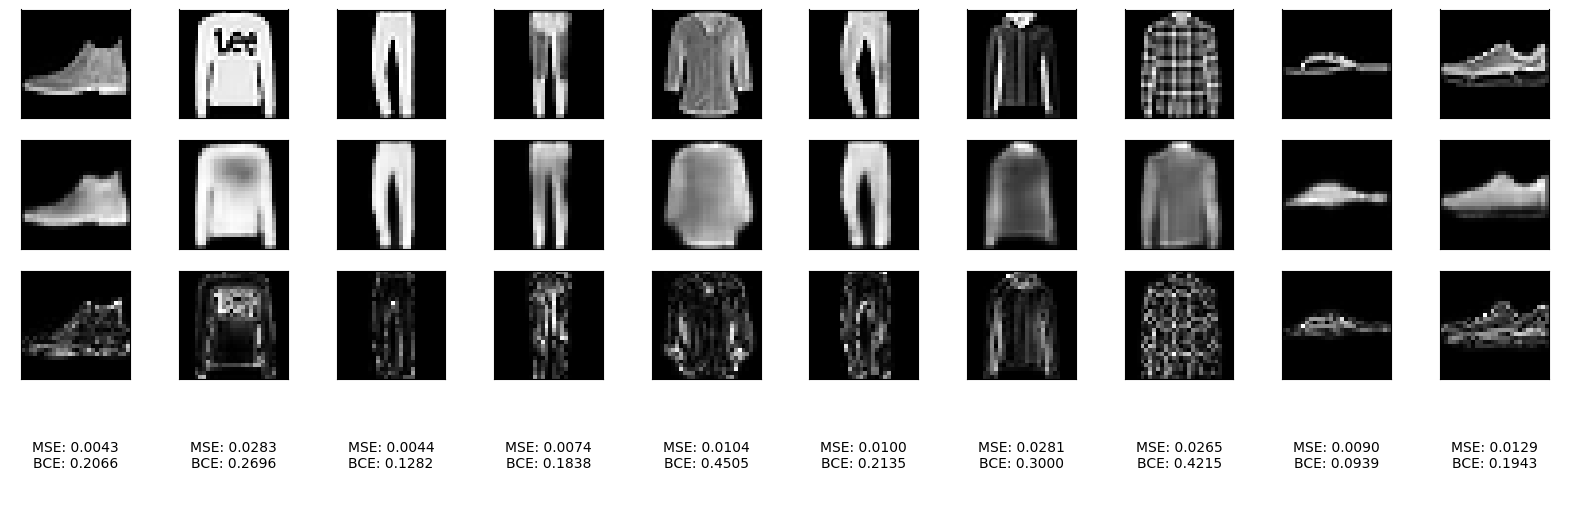

In [ ]:
# Predict on the entire test set
decoded_imgs = cnn_autoencoder.predict(x_test)

# Display results for the first 10 test images
display_ae_images_with_losses(x_test, decoded_imgs, n=10)

Given that this is an image dataset, it would be interesting to see how convolutional autoencoders perform. From the results above, it's evident that  the model was primarily able to reconstruct the outlines of the original images, but failed to capture additional details(e.g stripe patterns). Surprisingly, this model did not perform as well as the first or third models.

## Variational Auto Encoders


In [ ]:
def display_vae_images_with_losses(x_test, generator, latent_dim, n=10):
    plt.figure(figsize=(20, 6))

    for i in range(n):
        # Original image
        ax = plt.subplot(4, n, i + 1)
        original_img = x_test[i].reshape(28, 28, 1)
        plt.imshow(original_img)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Latent space sampling
        z_sample = np.array([np.random.normal(size=latent_dim)])
        x_decoded = generator.predict(z_sample)

        # Reconstructed image
        ax = plt.subplot(4, n, i + 1 + n)
        reconstructed_img = x_decoded[0].reshape(28, 28, 1)  # Corrected variable name
        plt.imshow(reconstructed_img)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Difference image
        ax = plt.subplot(4, n, i + 1 + n * 2)
        difference = np.abs(original_img - reconstructed_img)
        plt.imshow(difference)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Calculate losses
        mse_loss, bce_loss = calculate_reconstruction_losses(original_img.flatten(), reconstructed_img.flatten())

        # Add captions with losses
        ax = plt.subplot(4, n, i + 1 + n * 3)
        plt.axis('off')
        loss_caption = f"MSE: {mse_loss:.4f}\nBCE: {bce_loss:.4f}"
        plt.text(0.5, 0.5, loss_caption, ha='center', va='center', fontsize=10, transform=ax.transAxes)

    plt.show()

In [ ]:
# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [ ]:
#funtion to compile annd train variational auto encoders
def compile_and_train_vae(vae,x_train, x_test,latent_dim,decoder_mean, decoder_h,  ):
  vae.compile(optimizer='rmsprop')
  # Train the VAE

  vae.fit(x_train, shuffle=True, epochs=50, batch_size=256, validation_data=(x_test, None))

  # Build the decoder model to reconstruct images from sampled latent vectors
  decoder_input = Input(shape=(latent_dim,))
  _h_decoded = decoder_h(decoder_input)
  _x_decoded_mean = decoder_mean(_h_decoded)
  generator = Model(decoder_input, _x_decoded_mean)
  return generator

## Variational Autoencoder One
>
**Encoder:**

> The encoder consists of two layers.
* The first layer is the input layer, which takes in a 1D array of 784 elements (assuming the original image size is 28x28 pixels).
* The second layer is a dense (fully connected) layer with 256 units and a Rectified Linear Unit (ReLU) activation function.
* After these layers, there are two separate dense layers, each with 2 units. One of these represents the mean of the latent space (z_mean), and the other represents the log variance (z_log_var).

>
**Decoder:**

> The decoder consists of two layers.
* The first layer is a dense layer with 256 units and a ReLU activation function. This layer takes in the sampled latent space values.
* The second layer is a dense layer with 784 units and a sigmoid activation function. This layer reconstructs the original input from the encoded representation.

>
**VAE model:**

uses a loss function that is a combination of binary cross-entropy and the Kullback-Leibler divergence.

In [ ]:
def vae_model_one():
  # Define the size of the latent space
  latent_dim = 2

  # Encoder
  inputs = Input(shape=(784,))
  h = Dense(256, activation='relu')(inputs)
  z_mean = Dense(latent_dim)(h)
  z_log_var = Dense(latent_dim)(h)

  z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

  # Decoder
  decoder_h = Dense(256, activation='relu')
  decoder_mean = Dense(784, activation='sigmoid')
  h_decoded = decoder_h(z)
  x_decoded_mean = decoder_mean(h_decoded)

  # VAE model
  vae = Model(inputs, x_decoded_mean)

  # VAE loss
  xent_loss = binary_crossentropy(inputs, x_decoded_mean) * 784
  kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
  vae_loss = K.mean(xent_loss + kl_loss)

  vae.add_loss(vae_loss)
  generator = compile_and_train_vae(vae,flattened_x_train, flattened_x_test,latent_dim,decoder_mean, decoder_h)
  return generator

## Variational Autoencoder Two
>
**Encoder:**

>The encoder consists of three layers.

* The first layer is the input layer, which takes in a 1D array of 784 elements (assuming the original image size is 28x28 pixels).
* The second layer is a dense (fully connected) layer with 512 units and a Rectified Linear Unit (ReLU) activation function.
* The third layer is another dense layer with 256 units and a ReLU activation function.
* After these layers, there are two separate dense layers, each with 2 units. One of these represents the mean of the latent space (z_mean), and the other represents the log variance (z_log_var).

>
**Decoder:**

> The decoder consists of three layers.
* The first layer is a dense layer with 2 units and a ReLU activation function. * This layer takes in the sampled latent space values.
* The second layer is a dense layer with 512 units and a ReLU activation function.
* The third layer is a dense layer with 784 units and a sigmoid activation function. This layer reconstructs the original input from the encoded representation.

>
**VAE model:**

same as Variational Autoencoder One

In [ ]:
def vae_model_two():
  # Define the size of the latent space
  latent_dim = 2

  # Encoder
  inputs = Input(shape=(784,))
  h = Dense(512, activation='relu')(inputs)
  h = Dense(256, activation='relu')(h)
  z_mean = Dense(latent_dim)(h)
  z_log_var = Dense(latent_dim)(h)

  z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

  # Decoder
  decoder_h1 = Dense(latent_dim, activation='relu')
  # decoder_h1 = Dense(256, activation='relu')
  decoder_h2 = Dense(512, activation='relu')
  decoder_mean = Dense(784, activation='sigmoid')
  # h_d = decoder_h0(z)
  h_decoded = decoder_h1(z)
  h_decoded = decoder_h2(h_decoded)
  x_decoded_mean = decoder_mean(h_decoded)

  # VAE model
  vae = Model(inputs, x_decoded_mean)

  # VAE loss
  xent_loss = binary_crossentropy(inputs, x_decoded_mean) * 784
  kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
  vae_loss = K.mean(xent_loss + kl_loss)

  vae.add_loss(vae_loss)
  generator = compile_and_train_vae(vae,flattened_x_train, flattened_x_test,latent_dim,decoder_mean, decoder_h2,  )
  return generator

## Variational Autoencoder Three
>
**Encoder:**
>
The encoder consists of two layers.

* The first layer is the input layer, which takes in a 1D array of 784 elements (assuming the original image size is 28x28 pixels).
* The second layer is a dense (fully connected) layer with 256 units and a Rectified Linear Unit (ReLU) activation function.
* After these layers, there are two separate dense layers, each with 3 units.
* One of these represents the mean of the latent space (z_mean), and the other represents the log variance (z_log_var).

>
**Decoder:**
>
The decoder consists of two layers.

* The first layer is a dense layer with 256 units and a ReLU activation function. This layer takes in the sampled latent space values.
* The second layer is a dense layer with 784 units and a sigmoid activation function. This layer reconstructs the original input from the encoded representation.

>
**VAE Model:**
same as Variational Autoencoder One


In [ ]:
def vae_model_three():
  # Define the size of the latent space
  latent_dim = 3

  # Encoder
  inputs = Input(shape=(784,))
  h = Dense(256, activation='relu')(inputs)
  z_mean = Dense(latent_dim)(h)
  z_log_var = Dense(latent_dim)(h)

  z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

  # Decoder
  decoder_h = Dense(256, activation='relu')
  decoder_mean = Dense(784, activation='sigmoid')
  h_decoded = decoder_h(z)
  x_decoded_mean = decoder_mean(h_decoded)

  # VAE model
  vae = Model(inputs, x_decoded_mean)

  # VAE loss
  xent_loss = binary_crossentropy(inputs, x_decoded_mean) * 784
  kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
  vae_loss = K.mean(xent_loss + kl_loss)

  vae.add_loss(vae_loss)
  generator = compile_and_train_vae(vae,flattened_x_train, flattened_x_test,latent_dim,decoder_mean, decoder_h)
  return generator

Epoch 1/50
235/235 [==============================] - 8s 31ms/step - loss: 329.4386 - val_loss: 295.0360
Epoch 2/50
235/235 [==============================] - 9s 40ms/step - loss: 290.1315 - val_loss: 287.3364
Epoch 3/50
235/235 [==============================] - 7s 29ms/step - loss: 283.3118 - val_loss: 280.5563
Epoch 4/50
235/235 [==============================] - 8s 34ms/step - loss: 279.4538 - val_loss: 278.3100
Epoch 5/50
235/235 [==============================] - 6s 26ms/step - loss: 276.7397 - val_loss: 276.5803
Epoch 6/50
235/235 [==============================] - 8s 34ms/step - loss: 274.8724 - val_loss: 275.8636
Epoch 7/50
235/235 [==============================] - 6s 27ms/step - loss: 273.5077 - val_loss: 274.5789
Epoch 8/50
235/235 [==============================] - 8s 34ms/step - loss: 272.5494 - val_loss: 272.9311
Epoch 9/50
235/235 [==============================] - 10s 43ms/step - loss: 271.8362 - val_loss: 271.7500
Epoch 10/50
235/235 [==============================] -

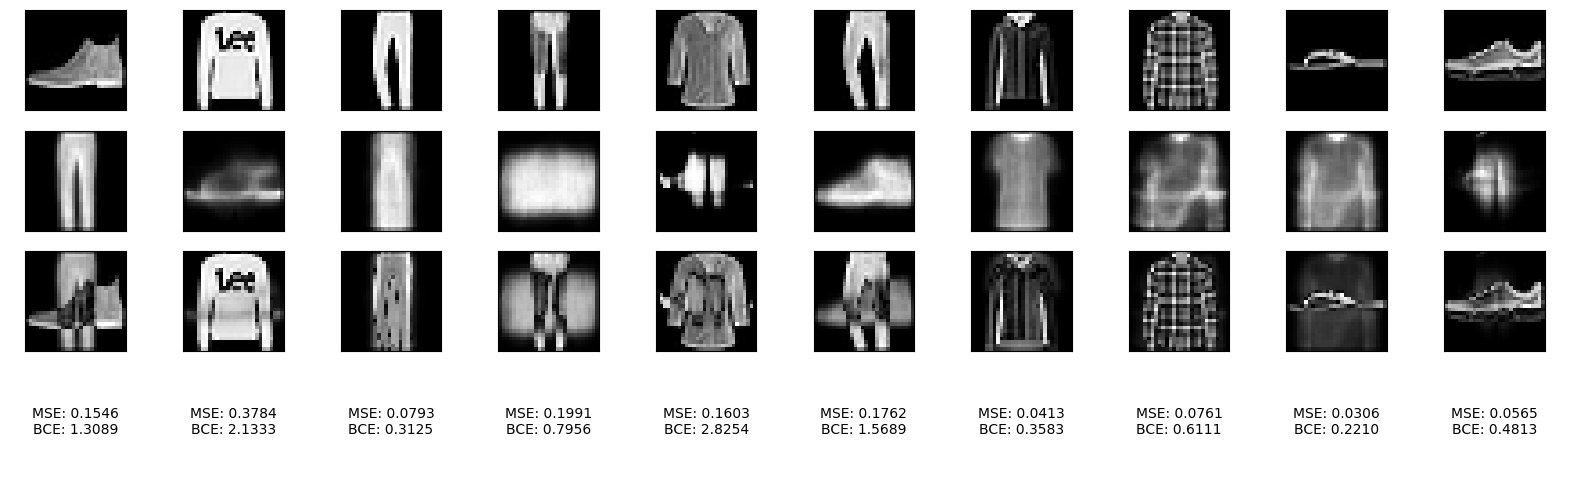

In [ ]:
vae_model_one_generator = vae_model_one()
display_vae_images_with_losses(x_test, vae_model_one_generator, latent_dim=2, n=10)

The first variational auto encoder hardly reconstructs anything similar to the original image except in the seventh image.some of the image outlines are hardly visible making it difficult to determine what image was reconstructed or generated.

Epoch 1/50
235/235 [==============================] - 20s 68ms/step - loss: 338.3654 - val_loss: 311.3953
Epoch 2/50
235/235 [==============================] - 17s 71ms/step - loss: 305.1541 - val_loss: 309.8790
Epoch 3/50
235/235 [==============================] - 13s 54ms/step - loss: 295.4008 - val_loss: 291.6924
Epoch 4/50
235/235 [==============================] - 15s 64ms/step - loss: 288.4966 - val_loss: 288.9681
Epoch 5/50
235/235 [==============================] - 15s 65ms/step - loss: 285.0889 - val_loss: 286.0225
Epoch 6/50
235/235 [==============================] - 13s 57ms/step - loss: 283.0069 - val_loss: 283.7540
Epoch 7/50
235/235 [==============================] - 14s 60ms/step - loss: 281.2364 - val_loss: 282.1565
Epoch 8/50
235/235 [==============================] - 12s 53ms/step - loss: 279.8429 - val_loss: 281.9186
Epoch 9/50
235/235 [==============================] - 13s 55ms/step - loss: 278.6100 - val_loss: 279.0864
Epoch 10/50
235/235 [=========================

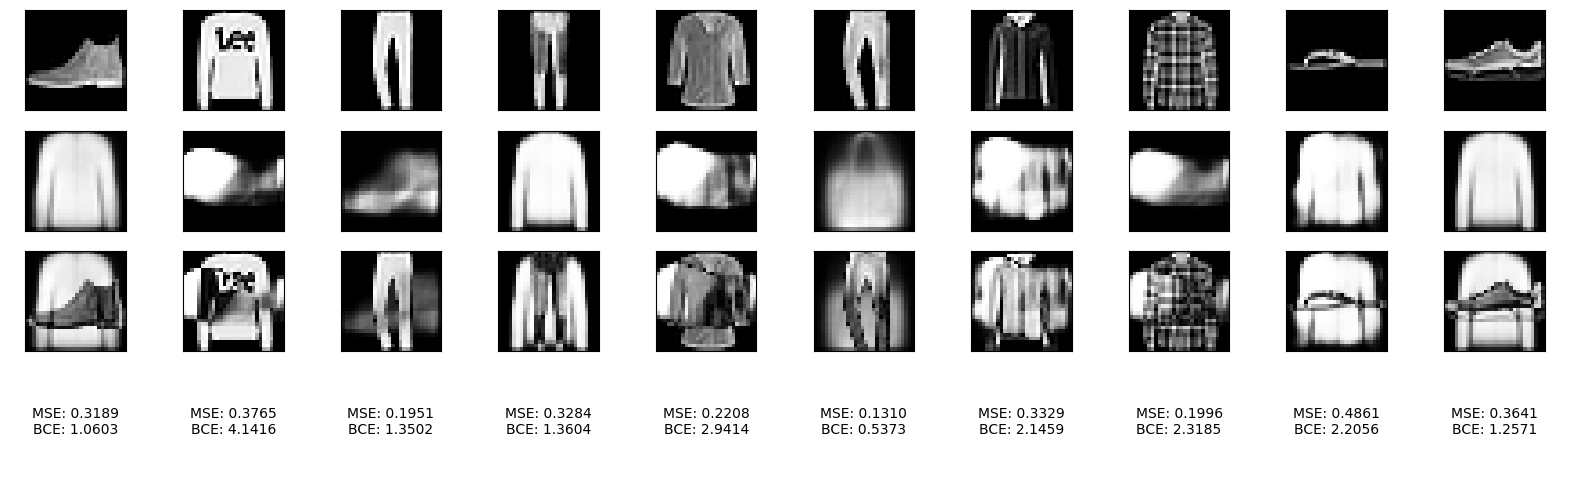

In [ ]:
vae_model_two_generator = vae_model_two()
display_vae_images_with_losses(x_test, vae_model_two_generator, latent_dim=2, n=10)

Compared to the first variational auto encoder, it appears adding more encoder layers enabled it to produce some discernable image outlines such as the long sleeve shirts, however it still does not construct any thing similar to the original image in the first row.

Epoch 1/50
235/235 [==============================] - 10s 36ms/step - loss: 320.1401 - val_loss: 288.9947
Epoch 2/50
235/235 [==============================] - 6s 25ms/step - loss: 277.8241 - val_loss: 273.6601
Epoch 3/50
235/235 [==============================] - 7s 29ms/step - loss: 268.8021 - val_loss: 267.0658
Epoch 4/50
235/235 [==============================] - 7s 31ms/step - loss: 264.8905 - val_loss: 265.9991
Epoch 5/50
235/235 [==============================] - 6s 25ms/step - loss: 262.8006 - val_loss: 265.2117
Epoch 6/50
235/235 [==============================] - 8s 35ms/step - loss: 261.3792 - val_loss: 262.2687
Epoch 7/50
235/235 [==============================] - 6s 26ms/step - loss: 260.2911 - val_loss: 260.5316
Epoch 8/50
235/235 [==============================] - 6s 26ms/step - loss: 259.4956 - val_loss: 259.8323
Epoch 9/50
235/235 [==============================] - 8s 34ms/step - loss: 258.7641 - val_loss: 259.0137
Epoch 10/50
235/235 [==============================] -

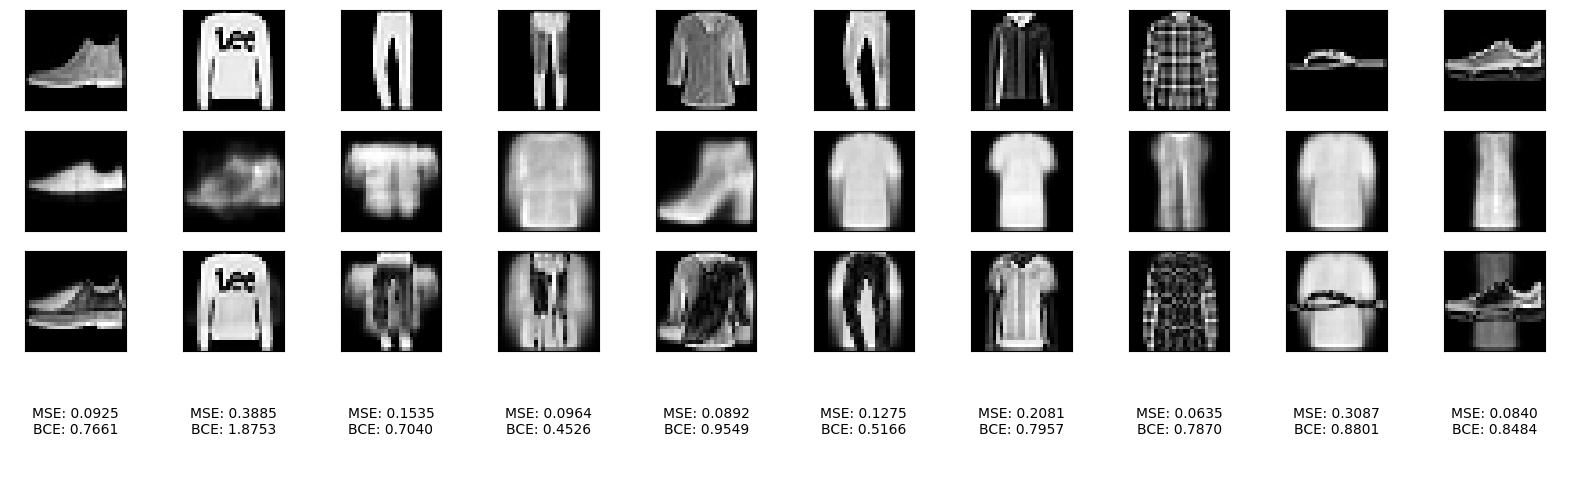

In [ ]:
vae_model_three_generator = vae_model_three()
display_vae_images_with_losses(x_test, vae_model_three_generator, latent_dim=3, n=10)

The images produced by this third model are more discernable by than that of the first model, but none is as clear the long sleeves in the second model. It follows the trend of not constructing anything similar to the original image.

## VAE with convolution.
>
This uses the same architecture as the traditional auto encoder

In [ ]:

# Load Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define the encoder
encoder_inputs = tf.keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, 3, activation="relu", padding="same")(encoder_inputs)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, 3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, 3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(2, name="z_mean")(x)
z_log_var = layers.Dense(2, name="z_log_var")(x)
encoder = tf.keras.Model(encoder_inputs, [z_mean, z_log_var], name="encoder")

latent_inputs = tf.keras.Input(shape=(2,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = tf.keras.Model(latent_inputs, decoder_outputs, name="decoder")

# Define the VAE as a Model with a custom train_step
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var = encoder(data)
            z = z_mean + tf.exp(0.5 * z_log_var) * tf.random.normal(shape=(2,))
            reconstruction = decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.keras.losses.binary_crossentropy(data, reconstruction)
            )
            reconstruction_loss *= 28 * 28
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(kl_loss)
            kl_loss *= -0.5
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

# Train the VAE
vae = VAE(encoder, decoder)
vae.compile(optimizer=tf.keras.optimizers.Adam())
vae.fit(x_train, epochs=50, batch_size=128)


Epoch 1/50
469/469 [==============================] - 119s 243ms/step - loss: 340.7376 - reconstruction_loss: 337.8516 - kl_loss: 2.8859
Epoch 2/50
469/469 [==============================] - 103s 219ms/step - loss: 277.4613 - reconstruction_loss: 273.6116 - kl_loss: 3.8496
Epoch 3/50
469/469 [==============================] - 104s 222ms/step - loss: 272.0178 - reconstruction_loss: 268.3405 - kl_loss: 3.6773
Epoch 4/50
469/469 [==============================] - 101s 215ms/step - loss: 269.3173 - reconstruction_loss: 265.6388 - kl_loss: 3.6785
Epoch 5/50
469/469 [==============================] - 105s 224ms/step - loss: 267.9024 - reconstruction_loss: 264.2673 - kl_loss: 3.6351
Epoch 6/50
469/469 [==============================] - 108s 231ms/step - loss: 266.5535 - reconstruction_loss: 262.9629 - kl_loss: 3.5906
Epoch 7/50
469/469 [==============================] - 112s 238ms/step - loss: 265.4077 - reconstruction_loss: 261.8513 - kl_loss: 3.5564
Epoch 8/50
469/469 [=====================

1/1 [==============================] - 0s 20ms/step


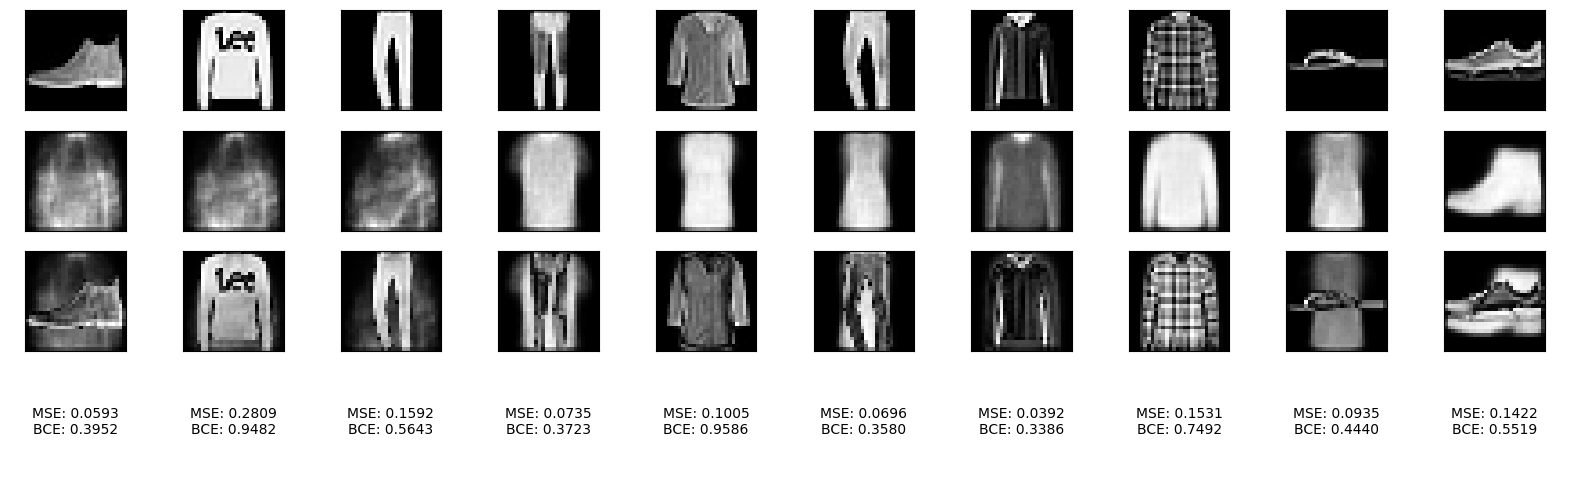

In [ ]:
display_vae_images_with_losses(x_test, decoder , latent_dim=2, n=10)

Excluding the 7th, 8th, and 10th images, the rest are not easily identifiable. However, it's worth mentioning that, unlike the previous models, the generated 7th, 8th, and 10th images bear some resemblance to their original counterparts. For example, the model produced a boot in the final image, which arguably shares some similarities with the shoe in the original image. This pattern is also observed in the 7th and 8th images.

## comparing latent dimensional space between the convolutional autoencoder and convolutional variational autoencoder

In [ ]:
def get_vae_encoder_cnn():
  encoder_inputs = Input(shape=(28, 28, 1))
  x = Conv2D(16, 3, activation="relu", padding="same")(encoder_inputs)
  x = MaxPooling2D((2, 2), padding='same')(x)
  x = Conv2D(8, 3, activation="relu", padding="same")(x)
  x = MaxPooling2D((2, 2), padding='same')(x)
  x = Conv2D(8, 3, activation="relu", padding="same")(x)
  x = MaxPooling2D((2, 2), padding='same')(x)
  x = Flatten()(x)
  x = Dense(16, activation="relu")(x)
  z_mean = Dense(2, name="z_mean")(x)
  z_log_var = Dense(2, name="z_log_var")(x)
  encoder = Model(encoder_inputs, [z_mean, z_log_var], name="encoder")
  return encoder

def get_ae_encoder_cnn():
  input_img= Input(shape=(28,28,1))
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
  x = MaxPooling2D((2, 2), padding='same')(x)
  x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  x = MaxPooling2D((2, 2), padding='same')(x)
  x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  encoded = MaxPooling2D((2, 2), padding='same')(x)
  encoder = Model(input_img, encoded)
  return encoder

79/79 [==============================] - 2s 18ms/step


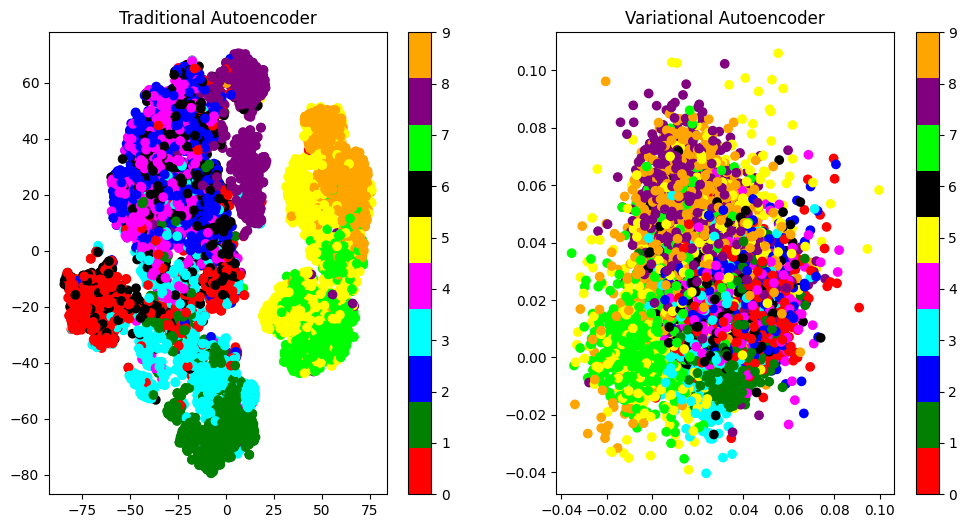

In [ ]:

# Define a list of colors for each class. Adjust this list to match the number of classes in your data.
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'lime', 'purple', 'orange']

# Create a colormap from this list
cmap = ListedColormap(colors)
# Assume that we have trained models `autoencoder`, `vae`, and their respective `encoder` parts
# Also assume that x_test is your test dataset

# Encode the test dataset into the latent space using the traditional autoencoder
encoder_ae = get_ae_encoder_cnn()
encoder_vae = get_vae_encoder_cnn()
x_test_encoded_ae = encoder_ae.predict(x_test)

# Encode the test dataset into the latent space using the variational autoencoder
x_test_encoded_vae = encoder_vae.predict(x_test, batch_size=128)[0]

# Create a matplotlib figure
plt.figure(figsize=(12, 6))

# Subplot for the traditional autoencoder
plt.subplot(1, 2, 1)
tsne = TSNE(n_components=2, random_state=0)
encoded_imgs_flattened = np.reshape(x_test_encoded_ae, (x_test_encoded_ae.shape[0], -1))
encoded_imgs_2d = tsne.fit_transform(encoded_imgs_flattened)
plt.scatter(encoded_imgs_2d[:, 0], encoded_imgs_2d[:, 1], c=y_test,cmap=cmap)
plt.colorbar()
plt.title('Traditional Autoencoder')

# Subplot for the variational autoencoder
plt.subplot(1, 2, 2)
plt.scatter(x_test_encoded_vae[:, 0], x_test_encoded_vae[:, 1], c=y_test,cmap=cmap)
plt.colorbar(ticks=range(10))
plt.title('Variational Autoencoder')

# Show the plot
plt.show()


There are distinct clusters of points formed in the latent space of the traditional autoencoder, with each cluster representing a class of similar inputs. This is due to the deterministic nature of traditional autoencoders, which always map a given input to the same point in the latent space.

On the other hand, the latent space of a Variational Autoencoder (VAE) displays overlapping distributions which look random. This is a reflection of the probabilistic nature of VAEs, which map a given input to a distribution of possible points in the latent space, thereby introducing variability and uncertainty in the encoded representations. This difference in the structure of the latent space is a fundamental distinction between traditional autoencoders and VAEs.

In [ ]:
def compare_images_(x_test,decoded_imgs, generator, latent_dim, n=10):
    plt.figure(figsize=(20, 6))

    for i in range(n):
        # Original image
        ax = plt.subplot(4, n, i + 1)
        original_img = x_test[i].reshape(28, 28, 1)
        plt.imshow(original_img)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


        # Reconstructed ae image
        ax = plt.subplot(4, n, i + 1 + n)
        reconstructed_img = decoded_imgs[i].reshape(28 , 28)
        plt.imshow(reconstructed_img)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Latent space sampling
        z_sample = np.array([np.random.normal(size=latent_dim)])
        x_decoded = generator.predict(z_sample)

        # Reconstructed vae image
        ax = plt.subplot(4, n, i + 1 + n * 2)
        reconstructed_img = x_decoded[0].reshape(28, 28, 1)  # Corrected variable name
        plt.imshow(reconstructed_img)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)



Comparing images of the best model for traditional auto encoders and variational auto encoders)

> traditional auto encoders -  model one

> variational auto encoders - model two

1/1 [==============================] - 0s 34ms/step


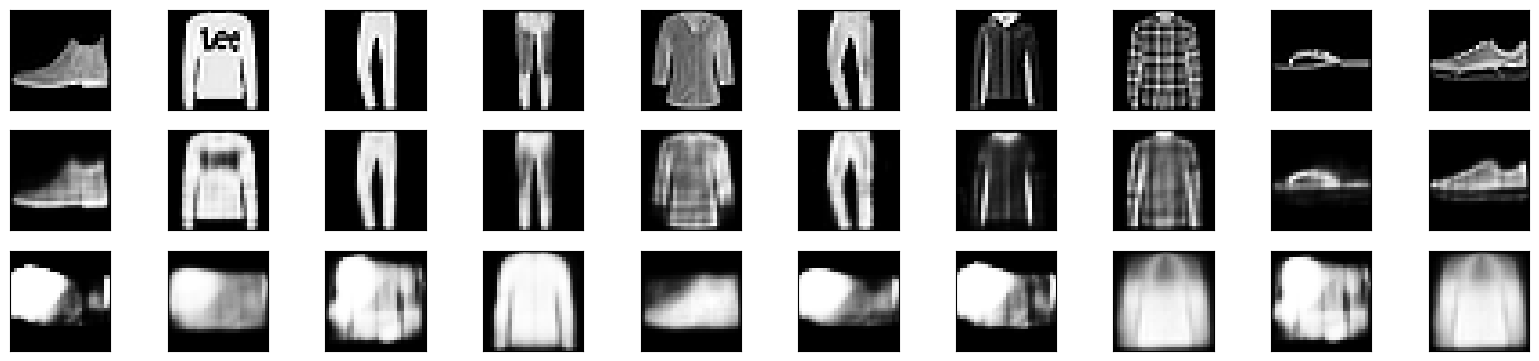

In [ ]:
compare_images_(x_test,ae_model_one_decoded_imgs, vae_model_two_generator, latent_dim=2, n=10)

The top represents the original image the second row represents the traditional autoencoder and the third is the variational auto encoder.

The inherent differences between traditional and variational autoencoders lead to distinct outputs. Traditional autoencoders are deterministic in nature, meaning they will always produce the same output for a given input. This is because they learn a fixed encoding for each input in the latent space.

On the other hand, variational autoencoders (VAEs) are probabilistic. They model the input data as a probability distribution in the latent space. This means that each time a VAE is run, it samples a different point from this distribution, leading to a different output. This is why you see variation in the images generated by the VAE from run to run.

This probabilistic nature of VAEs also implies that evaluating their performance based on a single run can be misleading. Since they generate a different sample each time, a single run might not accurately represent the model's overall ability to reconstruct inputs.